In [537]:
import os
import json
import copy
import pandas as pd
import matplotlib.pyplot as plt

In [538]:
# data frame skeletons to parse and plot using pandas
# *ts is denoted as nano seconds, the timestamp collected is: `time.Now().UnixNano()`

ttprList = {
    "signal bootstrapping0": [],
    "barrierbootstrapping0": [],
    "full bootstrapping0": [],
    "time-to-provide-0": [],
    "signal provider-records1": [],
    "barrierprovider-records1": [],
    "full provider-records1": [],
    "signal provider-records2": [],
    "barrierprovider-records2": [],
    "full provider-records2": []
}

diagnosticsList = {
    "EnableGC": {
        "val": [],
        "ts": []
    },
    "HeapAlloc": {
        "val": [],
        "ts": []
    },
    "LastGC": {
        "val": [],
        "ts": []
    },
    "NumGC": {
        "val": [],
        "ts": []
    },
    "MCacheSys": {
        "val": [],
        "ts": []
    },
#     "PauseNs": [],
    "StackSys": {
        "val": [],
        "ts": []
    },
#     "ReadMemStats": [],
    "StackInuse": {
        "val": [],
        "ts": []
    },
    "Sys": {
        "val": [],
        "ts": []
    },
    "NumThread": {
        "val": [],
        "ts": []
    },
    "HeapIdle": {
        "val": [],
        "ts": []
    },
    "HeapInuse": {
        "val": [],
        "ts": []
    },
    "Lookups": {
        "val": [],
        "ts": []
    },
    "MSpanInuse": {
        "val": [],
        "ts": []
    },
    "Frees": {
        "val": [],
        "ts": []
    },
    "NextGC": {
        "val": [],
        "ts": []
    },
    "NumCgoCall": {
        "val": [],
        "ts": []
    },
    "PauseTotalNs": {
        "val": [],
        "ts": []
    },
    "NumGoroutine": {
        "val": [],
        "ts": []
    },
    "BuckHashSys": {
        "val": [],
        "ts": []
    },
    "HeapObjects": {
        "val": [],
        "ts": []
    },
    "GCCPUFraction": {
        "val": [],
        "ts": []
    },
    "TotalAlloc": {
        "val": [],
        "ts": []
    },
    "DebugGC": {
        "val": [],
        "ts": []
    },
    "HeapReleased": {
        "val": [],
        "ts": []
    },
    "HeapSys": {
        "val": [],
        "ts": []
    },
    "MCacheInuse": {
        "val": [],
        "ts": []
    },
    "Alloc": {
        "val": [],
        "ts": []
    },
    "Mallocs": {
        "val": [],
        "ts": []
    },
    "MSpanSys": {
        "val": [],
        "ts": []
    },
    "pauseNs": {
        "ts": [],
        "count" : [],
        "max": [],
        "mean": [],
        "min": [],
        "p50": [],
        "p75": [],
        "p95": [],
        "p99": [],
        "p999": [],
        "p9999": [],
        "stddev": [],
        "variance": []
    },
    "readMemStats": {
        "ts": [],
        "count" : [],
        "m1": [],
        "m15": [],
        "m5": [],
        "max": [],
        "mean": [],
        "meanrate": [],
        "min": [],
        "p50": [],
        "p75": [],
        "p95": [],
        "p99": [],
        "p999": [],
        "p9999": [],
        "stddev": [],
        "variance": []
    }
}


# convenience methods
def resetListVars():
    global diagnosticsList
    diagnosticsList = {
        "EnableGC": {
            "val": [],
            "ts": []
        },
        "HeapAlloc": {
            "val": [],
            "ts": []
        },
        "LastGC": {
            "val": [],
            "ts": []
        },
        "NumGC": {
            "val": [],
            "ts": []
        },
        "MCacheSys": {
            "val": [],
            "ts": []
        },
    #     "PauseNs": [],
        "StackSys": {
            "val": [],
            "ts": []
        },
    #     "ReadMemStats": [],
        "StackInuse": {
            "val": [],
            "ts": []
        },
        "Sys": {
            "val": [],
            "ts": []
        },
        "NumThread": {
            "val": [],
            "ts": []
        },
        "HeapIdle": {
            "val": [],
            "ts": []
        },
        "HeapInuse": {
            "val": [],
            "ts": []
        },
        "Lookups": {
            "val": [],
            "ts": []
        },
        "MSpanInuse": {
            "val": [],
            "ts": []
        },
        "Frees": {
            "val": [],
            "ts": []
        },
        "NextGC": {
            "val": [],
            "ts": []
        },
        "NumCgoCall": {
            "val": [],
            "ts": []
        },
        "PauseTotalNs": {
            "val": [],
            "ts": []
        },
        "NumGoroutine": {
            "val": [],
            "ts": []
        },
        "BuckHashSys": {
            "val": [],
            "ts": []
        },
        "HeapObjects": {
            "val": [],
            "ts": []
        },
        "GCCPUFraction": {
            "val": [],
            "ts": []
        },
        "TotalAlloc": {
            "val": [],
            "ts": []
        },
        "DebugGC": {
            "val": [],
            "ts": []
        },
        "HeapReleased": {
            "val": [],
            "ts": []
        },
        "HeapSys": {
            "val": [],
            "ts": []
        },
        "MCacheInuse": {
            "val": [],
            "ts": []
        },
        "Alloc": {
            "val": [],
            "ts": []
        },
        "Mallocs": {
            "val": [],
            "ts": []
        },
        "MSpanSys": {
            "val": [],
            "ts": []
        },
        "pauseNs": {
            "ts": [],
            "count" : [],
            "max": [],
            "mean": [],
            "min": [],
            "p50": [],
            "p75": [],
            "p95": [],
            "p99": [],
            "p999": [],
            "p9999": [],
            "stddev": [],
            "variance": []
        },
        "readMemStats": {
            "ts": [],
            "count" : [],
            "m1": [],
            "m15": [],
            "m5": [],
            "max": [],
            "mean": [],
            "meanrate": [],
            "min": [],
            "p50": [],
            "p75": [],
            "p95": [],
            "p99": [],
            "p999": [],
            "p9999": [],
            "stddev": [],
            "variance": []
        }
    }
    return



In [539]:
### Parser and data collection sorting for file: results.out

runId="ce57kjfrirfl6i063rs0"
path="/Users/danielchoi/testground/data/outputs/local_docker/dht/"+runId+"/cypress-provider/"
filename="/results.out"
nodeNum=30

for i in range(nodeNum):
    with open(path+str(i)+filename, 'r') as f:
        lines = f.readlines()

    #     print(len(lines))
        for j in range(len(lines)):
#             print(lines[j])
            l = json.loads(lines[j])
#             print(l["name"])
#             print(l["measures"]["value"])
            
            # let's make a new dictionary for the values loaded by the files
            # compile everything into one array
            # be able to easily read the file and run calculations for the run tests
            
            if l["name"] == "signal bootstrapping0":
#                 print(l)
                ttprList["signal bootstrapping0"].append(l["measures"]["value"])
            elif l["name"] == "barrierbootstrapping0":
#                 print(l)
                ttprList["barrierbootstrapping0"].append(l["measures"]["value"])
            elif l["name"] == "full bootstrapping0":
#                 print(l)
                ttprList["full bootstrapping0"].append(l["measures"]["value"])
            elif l["name"] == "time-to-provide-0":
#                 print(l)
                ttprList["time-to-provide-0"].append(l["measures"]["value"])
            elif l["name"] == "signal provider-records1":
#                 print(l)
                ttprList["signal provider-records1"].append(l["measures"]["value"])
            elif l["name"] == "barrierprovider-records1":
#                 print(l)
                ttprList["barrierprovider-records1"].append(l["measures"]["value"])
            elif l["name"] == "full provider-records1":
#                 print(l)
                ttprList["full provider-records1"].append(l["measures"]["value"])
            elif l["name"] == "signal provider-records2":
#                 print(l)
                ttprList["signal provider-records2"].append(l["measures"]["value"])
            elif l["name"] == "barrierprovider-records2":
#                 print(l)
                ttprList["barrierprovider-records2"].append(l["measures"]["value"])
            elif l["name"] == "full provider-records2":
#                 print(l)
                ttprList["full provider-records2"].append(l["measures"]["value"])
            else:
                print("error parsing results.out")
        

    signal bootstrapping0  barrierbootstrapping0  full bootstrapping0  \
0                 7414000               23550958          33734955182   
1                11542209               30677375          33713592182   
2                11721000               34243875          33684113474   
3                14263208               55669209          33713883974   
4                 6288042               30574583          33733918890   
5                15332959               38831209          33709817015   
6                 5242250               56044834          33750816807   
7                 6143584               22052292          33715703516   
8                12066417               56300834          33725048015   
9                20663584               49101458          33690381307   
10               14089250               39613291          33720154807   
11                5385167               25168708          33756237224   
12               14361625               38115084   

<Figure size 640x480 with 0 Axes>

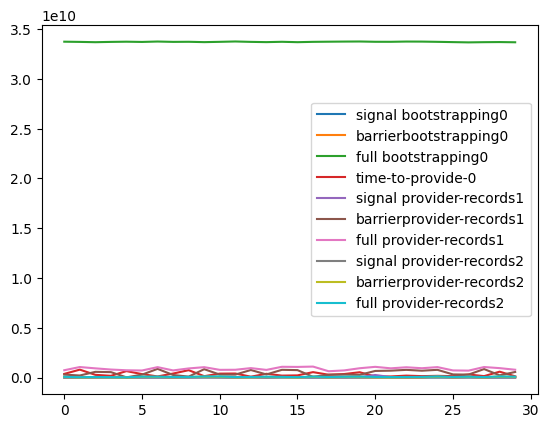

In [540]:
df = pd.DataFrame(ttprList)
plt.figure()
df.plot()

print(df)

In [541]:
filename="/diagnostics.out"

nodeDiagnostics = []

for i in range(nodeNum):    
    # this piece of code only searches and parses through a single node's diagnostic's file
    with open(path+str(i)+filename, 'r') as f:
            lines = f.readlines()
            for j in range(len(lines)):
    #             print(lines[j])
                l = json.loads(lines[j])

                if l["name"] == "runtime.MemStats.EnableGC":
                    diagnosticsList["EnableGC"]["val"].append(l["measures"]["value"])
                    diagnosticsList["EnableGC"]["ts"].append(l["ts"])
                elif l["name"] == "runtime.MemStats.HeapAlloc":
                    diagnosticsList["HeapAlloc"]["val"].append(l["measures"]["value"])
                    diagnosticsList["HeapAlloc"]["ts"].append(l["ts"])
                elif l["name"] == "runtime.MemStats.LastGC":
                    diagnosticsList["LastGC"]["val"].append(l["measures"]["value"])
                    diagnosticsList["LastGC"]["ts"].append(l["ts"])
                elif l["name"] == "runtime.MemStats.NumGC":
                    diagnosticsList["NumGC"]["val"].append(l["measures"]["value"])
                    diagnosticsList["NumGC"]["ts"].append(l["ts"])
                elif l["name"] == "runtime.MemStats.MCacheSys":
                    diagnosticsList["MCacheSys"]["val"].append(l["measures"]["value"])
                    diagnosticsList["MCacheSys"]["ts"].append(l["ts"])
                elif l["name"] == "runtime.MemStats.PauseNs":
                    diagnosticsList["pauseNs"]["ts"].append(l["ts"])
                    diagnosticsList["pauseNs"]["count"].append(l["measures"]["count"])
                    diagnosticsList["pauseNs"]["max"].append(l["measures"]["max"])
                    diagnosticsList["pauseNs"]["mean"].append(l["measures"]["mean"])
                    diagnosticsList["pauseNs"]["min"].append(l["measures"]["min"])
                    diagnosticsList["pauseNs"]["p50"].append(l["measures"]["p50"])
                    diagnosticsList["pauseNs"]["p75"].append(l["measures"]["p75"])
                    diagnosticsList["pauseNs"]["p95"].append(l["measures"]["p95"])
                    diagnosticsList["pauseNs"]["p99"].append(l["measures"]["p99"])
                    diagnosticsList["pauseNs"]["p999"].append(l["measures"]["p999"])
                    diagnosticsList["pauseNs"]["p9999"].append(l["measures"]["p9999"])
                    diagnosticsList["pauseNs"]["stddev"].append(l["measures"]["stddev"])
                    diagnosticsList["pauseNs"]["variance"].append(l["measures"]["variance"])
                elif l["name"] == "runtime.MemStats.StackSys":
                    diagnosticsList["StackSys"]["val"].append(l["measures"]["value"])
                    diagnosticsList["StackSys"]["ts"].append(l["ts"])
                elif l["name"] == "runtime.ReadMemStats":
                    diagnosticsList["readMemStats"]["ts"].append(l["ts"])
                    diagnosticsList["readMemStats"]["count"].append(l["measures"]["count"])
                    diagnosticsList["readMemStats"]["m1"].append(l["measures"]["m1"])
                    diagnosticsList["readMemStats"]["m15"].append(l["measures"]["m15"])
                    diagnosticsList["readMemStats"]["m5"].append(l["measures"]["m5"])
                    diagnosticsList["readMemStats"]["max"].append(l["measures"]["max"])
                    diagnosticsList["readMemStats"]["mean"].append(l["measures"]["mean"])
                    diagnosticsList["readMemStats"]["meanrate"].append(l["measures"]["meanrate"])
                    diagnosticsList["readMemStats"]["min"].append(l["measures"]["min"])
                    diagnosticsList["readMemStats"]["p50"].append(l["measures"]["p50"])
                    diagnosticsList["readMemStats"]["p75"].append(l["measures"]["p75"])
                    diagnosticsList["readMemStats"]["p95"].append(l["measures"]["p95"])
                    diagnosticsList["readMemStats"]["p99"].append(l["measures"]["p99"])
                    diagnosticsList["readMemStats"]["p999"].append(l["measures"]["p999"])
                    diagnosticsList["readMemStats"]["p9999"].append(l["measures"]["p9999"])
                    diagnosticsList["readMemStats"]["stddev"].append(l["measures"]["stddev"])
                    diagnosticsList["readMemStats"]["variance"].append(l["measures"]["variance"])
                elif l["name"] == "runtime.MemStats.StackInuse":
                    diagnosticsList["StackInuse"]["val"].append(l["measures"]["value"])
                    diagnosticsList["StackInuse"]["ts"].append(l["ts"])
                elif l["name"] == "runtime.MemStats.Sys":
                    diagnosticsList["Sys"]["val"].append(l["measures"]["value"])
                    diagnosticsList["Sys"]["ts"].append(l["ts"])
                elif l["name"] == "runtime.NumThread":
                    diagnosticsList["NumThread"]["val"].append(l["measures"]["value"])
                    diagnosticsList["NumThread"]["ts"].append(l["ts"])
                elif l["name"] == "runtime.MemStats.HeapIdle":
                    diagnosticsList["HeapIdle"]["val"].append(l["measures"]["value"])
                    diagnosticsList["HeapIdle"]["ts"].append(l["ts"])
                elif l["name"] == "runtime.MemStats.HeapInuse":
                    diagnosticsList["HeapInuse"]["val"].append(l["measures"]["value"])
                    diagnosticsList["HeapInuse"]["ts"].append(l["ts"])
                elif l["name"] == "runtime.MemStats.Lookups":
                    diagnosticsList["Lookups"]["val"].append(l["measures"]["value"])
                    diagnosticsList["Lookups"]["ts"].append(l["ts"])
                elif l["name"] == "runtime.MemStats.MSpanInuse":
                    diagnosticsList["MSpanInuse"]["val"].append(l["measures"]["value"])
                    diagnosticsList["MSpanInuse"]["ts"].append(l["ts"])
                elif l["name"] == "runtime.MemStats.Frees":
                    diagnosticsList["Frees"]["val"].append(l["measures"]["value"])
                    diagnosticsList["Frees"]["ts"].append(l["ts"])
                elif l["name"] == "runtime.MemStats.NextGC":
                    diagnosticsList["NextGC"]["val"].append(l["measures"]["value"])
                    diagnosticsList["NextGC"]["ts"].append(l["ts"])
                elif l["name"] == "runtime.NumCgoCall":
                    diagnosticsList["NumCgoCall"]["val"].append(l["measures"]["value"])
                    diagnosticsList["NumCgoCall"]["ts"].append(l["ts"])
                elif l["name"] == "runtime.MemStats.PauseTotalNs":
                    diagnosticsList["PauseTotalNs"]["val"].append(l["measures"]["value"])
                    diagnosticsList["PauseTotalNs"]["ts"].append(l["ts"])
                elif l["name"] == "runtime.NumGoroutine":
                    diagnosticsList["NumGoroutine"]["val"].append(l["measures"]["value"])
                    diagnosticsList["NumGoroutine"]["ts"].append(l["ts"])
                elif l["name"] == "runtime.MemStats.BuckHashSys":
                    diagnosticsList["BuckHashSys"]["val"].append(l["measures"]["value"])
                    diagnosticsList["BuckHashSys"]["ts"].append(l["ts"])
                elif l["name"] == "runtime.MemStats.HeapObjects":
                    diagnosticsList["HeapObjects"]["val"].append(l["measures"]["value"])
                    diagnosticsList["HeapObjects"]["ts"].append(l["ts"])
                elif l["name"] == "runtime.MemStats.GCCPUFraction":
                    diagnosticsList["GCCPUFraction"]["val"].append(l["measures"]["value"])
                    diagnosticsList["GCCPUFraction"]["ts"].append(l["ts"])
                elif l["name"] == "runtime.MemStats.TotalAlloc":
                    diagnosticsList["TotalAlloc"]["val"].append(l["measures"]["value"])
                    diagnosticsList["TotalAlloc"]["ts"].append(l["ts"])
                elif l["name"] == "runtime.MemStats.DebugGC":
                    diagnosticsList["DebugGC"]["val"].append(l["measures"]["value"])
                    diagnosticsList["DebugGC"]["ts"].append(l["ts"])
                elif l["name"] == "runtime.MemStats.HeapReleased":
                    diagnosticsList["HeapReleased"]["val"].append(l["measures"]["value"])
                    diagnosticsList["HeapReleased"]["ts"].append(l["ts"])
                elif l["name"] == "runtime.MemStats.HeapSys":
                    diagnosticsList["HeapSys"]["val"].append(l["measures"]["value"])
                    diagnosticsList["HeapSys"]["ts"].append(l["ts"])
                elif l["name"] == "runtime.MemStats.MCacheInuse":
                    diagnosticsList["MCacheInuse"]["val"].append(l["measures"]["value"])
                    diagnosticsList["MCacheInuse"]["ts"].append(l["ts"])
                elif l["name"] == "runtime.MemStats.Alloc":
                    diagnosticsList["Alloc"]["val"].append(l["measures"]["value"])
                    diagnosticsList["Alloc"]["ts"].append(l["ts"])
                elif l["name"] == "runtime.MemStats.Mallocs":
                    diagnosticsList["Mallocs"]["val"].append(l["measures"]["value"])
                    diagnosticsList["Mallocs"]["ts"].append(l["ts"])
                elif l["name"] == "runtime.MemStats.MSpanSys":
                    diagnosticsList["MSpanSys"]["val"].append(l["measures"]["value"])
                    diagnosticsList["MSpanSys"]["ts"].append(l["ts"])
                else:
                    print("error parsing results.out")
            nodeDiagnostics.append(diagnosticsList)
            resetListVars()



<Figure size 640x480 with 0 Axes>

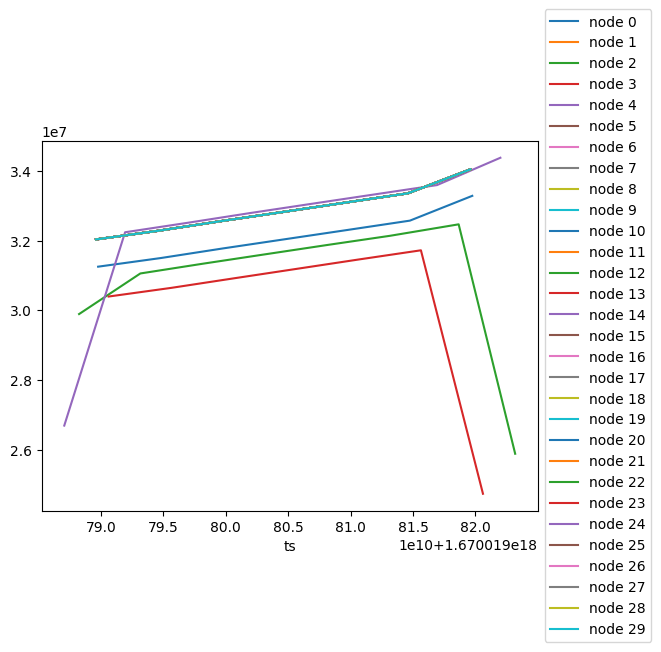

In [542]:
# HeapAlloc aggregated data plotting

df1 = pd.DataFrame(nodeDiagnostics[0]["HeapAlloc"])
df2 = pd.DataFrame(nodeDiagnostics[1]["HeapAlloc"])
df3 = pd.DataFrame(nodeDiagnostics[2]["HeapAlloc"])
df4 = pd.DataFrame(nodeDiagnostics[3]["HeapAlloc"])
df5 = pd.DataFrame(nodeDiagnostics[4]["HeapAlloc"])
df6 = pd.DataFrame(nodeDiagnostics[5]["HeapAlloc"])
df7 = pd.DataFrame(nodeDiagnostics[6]["HeapAlloc"])
df8 = pd.DataFrame(nodeDiagnostics[7]["HeapAlloc"])
df9 = pd.DataFrame(nodeDiagnostics[8]["HeapAlloc"])
df10 = pd.DataFrame(nodeDiagnostics[9]["HeapAlloc"])
df11 = pd.DataFrame(nodeDiagnostics[10]["HeapAlloc"])
df12 = pd.DataFrame(nodeDiagnostics[11]["HeapAlloc"])
df13 = pd.DataFrame(nodeDiagnostics[12]["HeapAlloc"])
df14 = pd.DataFrame(nodeDiagnostics[13]["HeapAlloc"])
df15 = pd.DataFrame(nodeDiagnostics[14]["HeapAlloc"])
df16 = pd.DataFrame(nodeDiagnostics[15]["HeapAlloc"])
df17 = pd.DataFrame(nodeDiagnostics[16]["HeapAlloc"])
df18 = pd.DataFrame(nodeDiagnostics[17]["HeapAlloc"])
df19 = pd.DataFrame(nodeDiagnostics[18]["HeapAlloc"])
df20 = pd.DataFrame(nodeDiagnostics[19]["HeapAlloc"])
df21 = pd.DataFrame(nodeDiagnostics[20]["HeapAlloc"])
df22 = pd.DataFrame(nodeDiagnostics[21]["HeapAlloc"])
df23 = pd.DataFrame(nodeDiagnostics[22]["HeapAlloc"])
df24 = pd.DataFrame(nodeDiagnostics[23]["HeapAlloc"])
df25 = pd.DataFrame(nodeDiagnostics[24]["HeapAlloc"])
df26 = pd.DataFrame(nodeDiagnostics[25]["HeapAlloc"])
df27 = pd.DataFrame(nodeDiagnostics[26]["HeapAlloc"])
df28 = pd.DataFrame(nodeDiagnostics[27]["HeapAlloc"])
df29 = pd.DataFrame(nodeDiagnostics[28]["HeapAlloc"])
df30 = pd.DataFrame(nodeDiagnostics[29]["HeapAlloc"])

plt.figure()

ax1 = df1.plot(x="ts", y="val", kind="line", rot=0)
ax2 = df2.plot(ax=ax1, x="ts", y="val", kind="line", rot=0)
ax3 = df3.plot(ax=ax2, x="ts", y="val", kind="line", rot=0)

ax4 = df4.plot(ax=ax3, x="ts", y="val", kind="line", rot=0)
ax5 = df5.plot(ax=ax4, x="ts", y="val", kind="line", rot=0)
ax6 = df2.plot(ax=ax5, x="ts", y="val", kind="line", rot=0)
ax7 = df2.plot(ax=ax6, x="ts", y="val", kind="line", rot=0)
ax8 = df2.plot(ax=ax7, x="ts", y="val", kind="line", rot=0)
ax9 = df2.plot(ax=ax8, x="ts", y="val", kind="line", rot=0)
ax10 = df2.plot(ax=ax9, x="ts", y="val", kind="line", rot=0)
ax11 = df2.plot(ax=ax10, x="ts", y="val", kind="line", rot=0)
ax12 = df2.plot(ax=ax11, x="ts", y="val", kind="line", rot=0)
ax13 = df2.plot(ax=ax12, x="ts", y="val", kind="line", rot=0)
ax14 = df2.plot(ax=ax13, x="ts", y="val", kind="line", rot=0)
ax15 = df2.plot(ax=ax14, x="ts", y="val", kind="line", rot=0)
ax16 = df2.plot(ax=ax15, x="ts", y="val", kind="line", rot=0)
ax17 = df2.plot(ax=ax16, x="ts", y="val", kind="line", rot=0)
ax18 = df2.plot(ax=ax17, x="ts", y="val", kind="line", rot=0)
ax19 = df2.plot(ax=ax18, x="ts", y="val", kind="line", rot=0)
ax20 = df2.plot(ax=ax19, x="ts", y="val", kind="line", rot=0)
ax21 = df2.plot(ax=ax20, x="ts", y="val", kind="line", rot=0)
ax22 = df2.plot(ax=ax21, x="ts", y="val", kind="line", rot=0)
ax23 = df2.plot(ax=ax22, x="ts", y="val", kind="line", rot=0)
ax24 = df2.plot(ax=ax23, x="ts", y="val", kind="line", rot=0)
ax25 = df2.plot(ax=ax24, x="ts", y="val", kind="line", rot=0)
ax26 = df2.plot(ax=ax25, x="ts", y="val", kind="line", rot=0)
ax27 = df2.plot(ax=ax26, x="ts", y="val", kind="line", rot=0)
ax28 = df2.plot(ax=ax27, x="ts", y="val", kind="line", rot=0)
ax29 = df2.plot(ax=ax28, x="ts", y="val", kind="line", rot=0)
ax30 = df2.plot(ax=ax29, x="ts", y="val", kind="line", rot=0)

plt.legend([
    'node 0', 'node 1', 'node 2', 'node 3', 'node 4', 'node 5',
    'node 6', 'node 7', 'node 8', 'node 9', 'node 10', 'node 11', 
    'node 12', 'node 13', 'node 14', 'node 15', 'node 16', 'node 17', 
    'node 18', 'node 19', 'node 20', 'node 21', 'node 22', 'node 23', 
    'node 24', 'node 25', 'node 26', 'node 27', 'node 28', 'node 29', 
    'node 30'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


<AxesSubplot: xlabel='ts'>

<Figure size 640x480 with 0 Axes>

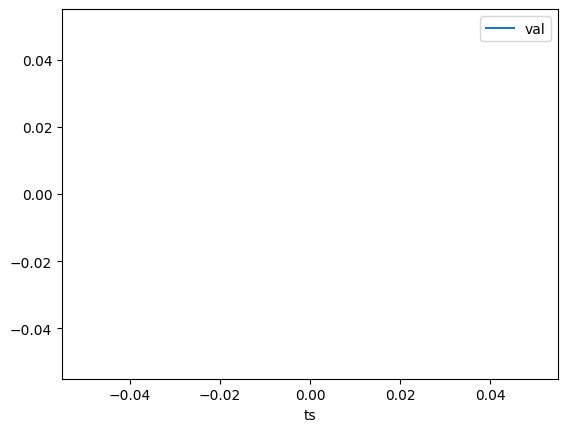